In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
data = pd.read_csv('/home/wings/Downloads/homogeneous-150/hypothesis', header=None, delimiter=' ')

In [9]:
%%time

X_dist = []
Y_signal = []

for i in range(len(data)):
    x_t = data.iat[i, 0]
    y_t = data.iat[i, 1]
    x_s = data.iat[i, 2]
    y_s = data.iat[i, 3]
    dist = math.sqrt((x_t-x_s)**2 + (y_t-y_s)**2)
    if dist in X_dist:
        continue
    signal = data.iloc[i, 4]
    X_dist.append(dist)
    Y_signal.append(signal)

CPU times: user 20.8 s, sys: 3.96 ms, total: 20.8 s
Wall time: 20.8 s


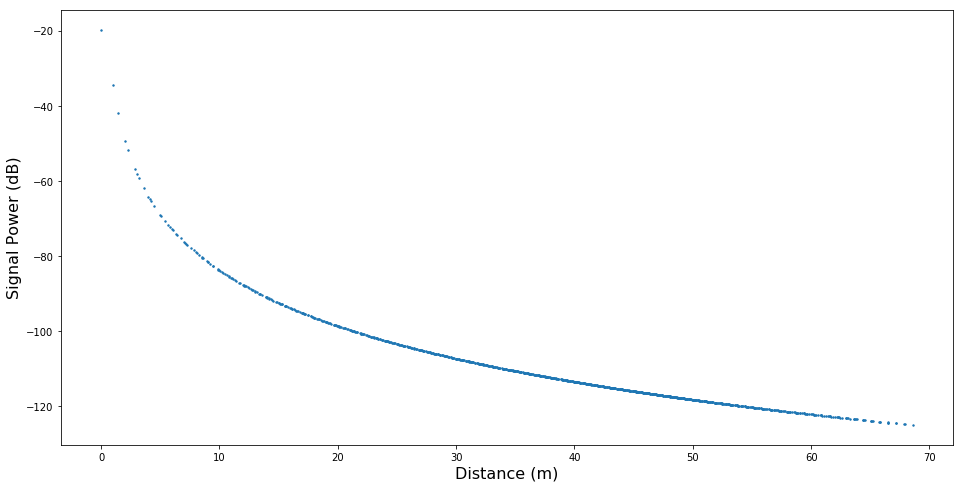

In [11]:
plt.figure(figsize=(16, 8))
plt.scatter(X_dist, Y_signal, s=2)
plt.xlabel('Distance (m)', fontsize=16)
plt.ylabel('Signal Power (dB)', fontsize=16)
plt.show()

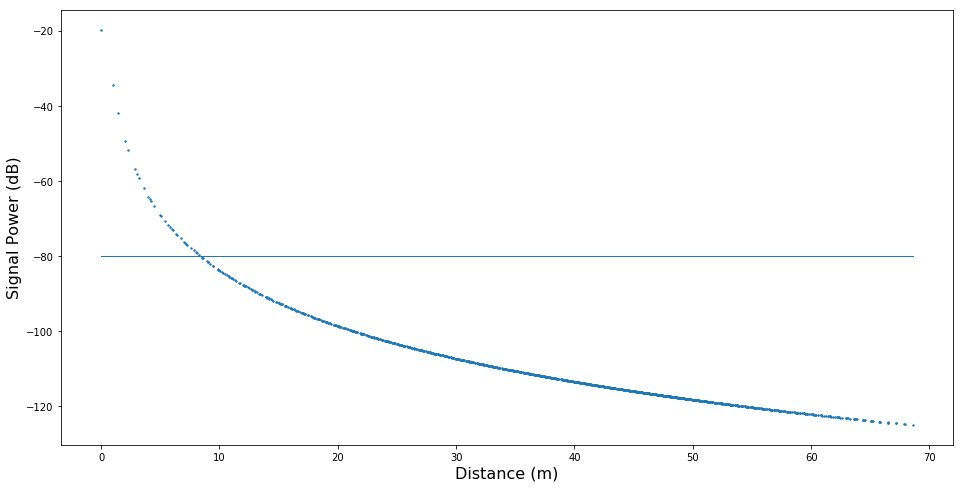

In [12]:
Y_80 = [-80] * len(X_dist)

plt.figure(figsize=(16, 8))
plt.scatter(X_dist, Y_signal, s=2)
plt.plot(X_dist, Y_80, linewidth=1)

plt.xlabel('Distance (m)', fontsize=16)
plt.ylabel('Signal Power (dB)', fontsize=16)
plt.show()

In [24]:
math.sqrt(2)/2 * 8.3

5.868986283848345

In [23]:
(2-math.sqrt(2)/2) * 8.3

10.731013716151656

In [30]:
for dist, sig in zip(X_dist, Y_signal):
    if sig>=-91 and sig <= -90:
        print(dist, sig)

13.416407864998739 -90.12687944291687
13.92838827718412 -90.92831629289057
13.601470508735444 -90.42004585217478
13.341664064126334 -90.00732619273235
13.892443989449804 -90.87301950535027
13.45362404707371 -90.18615884426269


[-108.47505898837149,
 -119.05907693356957,
 -120.38589787156799,
 -97.83665454039884,
 -116.49998733544257,
 -111.71780603552556,
 -116.15587627501291,
 -106.35165288126385,
 -114.35226844197588,
 -103.4460650056725,
 -101.1649178907632,
 -116.35752335349564,
 -115.02272783303492,
 -120.92734701069901,
 -96.4491142055408,
 -121.2531573747874,
 -113.15743953670591,
 -110.65523770621719,
 -106.77381983363662,
 -101.68192205674684,
 -114.48122150697752,
 -118.37302965670513,
 -115.56575706308772,
 -91.51843550481577,
 -115.46044764688156,
 -116.96000323300194,
 -121.45862240179669,
 -119.85628767783588,
 -96.70930707691734,
 -115.83265576952043,
 -121.60703721008471,
 -101.4781081882398,
 -122.72842468493583,
 -103.51432619141188,
 -111.38879917260464,
 -117.2607564647312,
 -107.35959370775986,
 -121.15874105162642,
 -113.61052056168627,
 -109.54339454477791,
 -95.44903983487382,
 -103.23862901799312,
 -115.59329866021099,
 -103.7165351304022,
 -113.13669658111479,
 -109.15892547488123,


/home/wings/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/home/wings/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


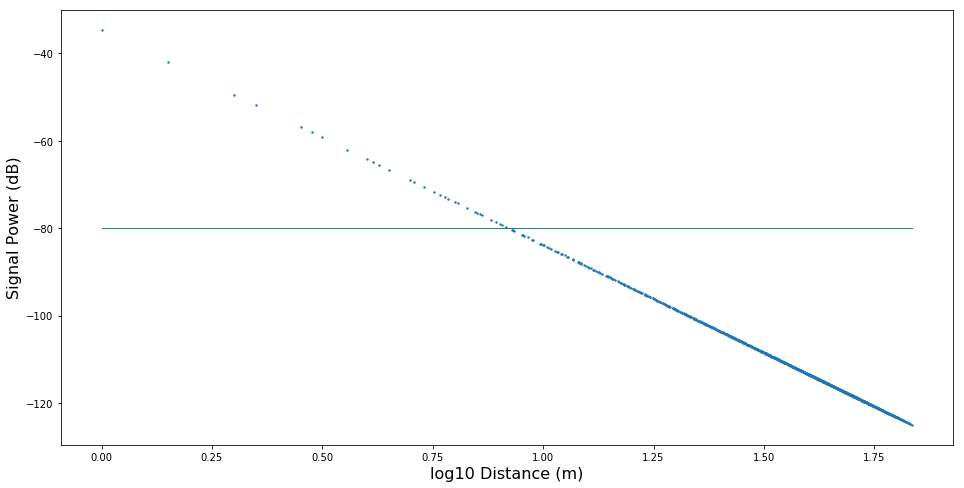

In [32]:
plt.figure(figsize=(16, 8))
plt.scatter(np.log10(X_dist), Y_signal, s=2)
plt.plot(np.log10(X_dist), Y_80, linewidth=1)
plt.xlabel('log10 Distance (m)', fontsize=16)
plt.ylabel('Signal Power (dB)', fontsize=16)
plt.show()